In [1]:
#WeatherPy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [4]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])        
        print(f"Processing Record {cities.index(city) + 1} | {city}")
    except KeyError:
        print("City not found. Skipping...")
print("------------------------")
print("Data Retrieval Completed")
print("------------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 | saldanha
Processing Record 2 | dali
City not found. Skipping...
Processing Record 4 | port elizabeth
Processing Record 5 | grindavik
Processing Record 6 | ferkessedougou
Processing Record 7 | makokou
Processing Record 8 | faanui
Processing Record 9 | kysyl-syr
Processing Record 10 | kaitangata
Processing Record 11 | tezu
Processing Record 12 | tura
Processing Record 13 | acaponeta
Processing Record 14 | flin flon
City not found. Skipping...
Processing Record 16 | champerico
Processing Record 17 | dikson
Processing Record 18 | comodoro rivadavia
Processing Record 19 | tamandare
Processing Record 20 | san gavino monreale
Processing Record 21 | araouane
City not found. Skipping...
Processing Record 23 | dingle
Processing Record 24 | hobart
Processing Record 25 | zaysan
Processing Record 26 | katsuura
City not found. Skipping...
Processing Record 28 | punta arenas
Processing Record 29 | ushuaia
Processing Record 30 | c

Processing Record 253 | honningsvag
Processing Record 254 | tres arroyos
Processing Record 255 | ballina
Processing Record 256 | lasa
Processing Record 257 | vero beach
Processing Record 258 | neryungri
Processing Record 259 | taoudenni
Processing Record 260 | belaya gora
Processing Record 261 | naze
Processing Record 262 | wanning
Processing Record 263 | jablonec
Processing Record 264 | hualmay
Processing Record 265 | ilulissat
Processing Record 266 | richards bay
Processing Record 267 | ewo
Processing Record 268 | luangwa
Processing Record 269 | hailar
Processing Record 270 | chiredzi
Processing Record 271 | clinton
Processing Record 272 | torbay
City not found. Skipping...
Processing Record 274 | lom sak
Processing Record 275 | santiago del estero
Processing Record 276 | nome
Processing Record 277 | berlevag
Processing Record 278 | boyuibe
Processing Record 279 | sayyan
Processing Record 280 | alofi
Processing Record 281 | bethel
Processing Record 282 | olafsvik
City not found. Skip

Processing Record 504 | lakatoro
Processing Record 505 | olpad
Processing Record 506 | praia
Processing Record 507 | upata
Processing Record 508 | acapulco
Processing Record 509 | abong mbang
Processing Record 510 | chimore
Processing Record 511 | albanel
Processing Record 512 | piopio
Processing Record 513 | bosaso
Processing Record 514 | dongying
Processing Record 515 | viedma
Processing Record 516 | ayagoz
Processing Record 517 | pingliang
Processing Record 518 | sioux lookout
Processing Record 519 | muroto
Processing Record 520 | jiuquan
City not found. Skipping...
Processing Record 522 | orissaare
Processing Record 523 | pyaozerskiy
Processing Record 524 | adeje
City not found. Skipping...
Processing Record 526 | ixtapa
Processing Record 527 | kismayo
Processing Record 528 | rampur hat
Processing Record 529 | kirensk
Processing Record 530 | leningradskiy
Processing Record 531 | daru
Processing Record 532 | progreso
Processing Record 533 | kalmunai
Processing Record 534 | srem
Proc

In [5]:
#Convert Raw Data to DataFrame
weather = {
    "City": city_name,
    "Lat": lat, 
    "Lng": lng, 
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date}  
weather_df = pd.DataFrame(weather)
#Export the city data into a .csv.
weather_df.to_csv('weather_df.csv')
#Display the DataFrame
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,-33.01,17.94,48.20,81,0,5.82,ZA,1595801663
1,Dali,25.70,100.18,59.11,86,98,2.17,CN,1595801663
2,Port Elizabeth,-33.92,25.57,55.40,87,75,10.29,ZA,1595801663
3,Grindavik,63.84,-22.43,50.00,87,83,12.75,IS,1595801664
4,Ferkessédougou,9.60,-5.20,73.08,92,73,5.99,CI,1595801664
...,...,...,...,...,...,...,...,...,...
570,San Francisco,37.77,-122.42,71.60,60,20,21.92,US,1595801746
571,Honiara,-9.43,159.95,77.00,88,20,2.24,SB,1595801778
572,Winneba,5.35,-0.62,75.20,94,39,11.41,GH,1595801778
573,Vangaindrano,-23.35,47.60,59.67,84,1,4.61,MG,1595801779


In [10]:
#Inspect the data and remove the cities where the humidity > 100%.
#Skip this step if there are no cities that have humidity > 100%.
weather_df.sort_values(by =["Max Temp"], ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
171,Udachny,66.42,112.40,33.80,100,90,8.95,RU,1595801697
24,Ushuaia,-54.80,-68.30,33.80,86,90,20.80,AR,1595801668
23,Punta Arenas,-53.15,-70.92,35.60,80,20,13.87,CL,1595801668
183,Tiksi,71.69,128.87,37.13,94,100,12.75,RU,1595801699
32,Saskylakh,71.92,114.08,37.78,94,100,18.39,RU,1595801670
...,...,...,...,...,...,...,...,...,...
234,Taoudenni,22.68,-3.98,102.72,8,4,15.26,ML,1595801709
175,Sonoita,31.85,-112.83,104.00,14,0,5.99,MX,1595801698
223,Dixon,38.45,-121.82,104.00,28,1,6.93,US,1595801707
337,Brawley,32.98,-115.53,107.60,13,1,9.17,US,1595801729


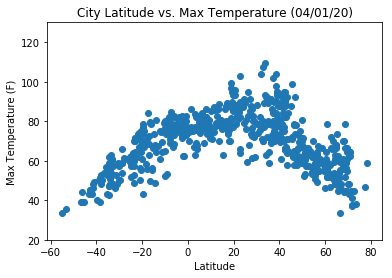

In [12]:
#Latitude vs Max Temperature plot Latitude vs. Humidity Plot

plt.scatter(weather_df['Lat'], weather_df['Max Temp'])
plt.title(f"City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(20, 130)
plt.savefig("Lat vs Temp.png")
plt.show()

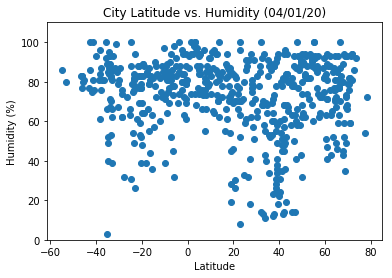

In [16]:
#Latitude vs. Humidity Plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'])
plt.title(f"City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 110)
plt.savefig("Lat vs Hum.png")
plt.show() 

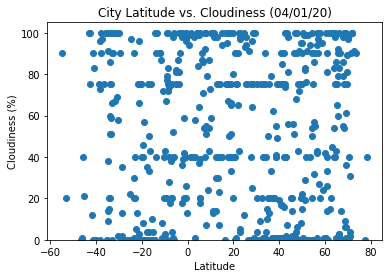

In [19]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'])
plt.title(f"City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0, 105)
plt.savefig("Lat vs Cloud.png")
plt.show()

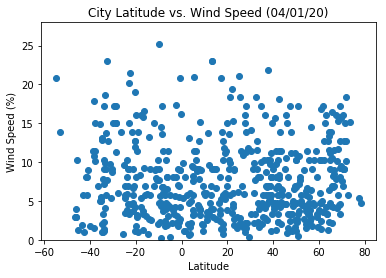

In [21]:
#Latitude vs. Wind Speed Plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'])
plt.title(f"City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(0, 28)
plt.savefig("Lat vs Wind.png")
plt.show()

In [25]:
#Linear regression function
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

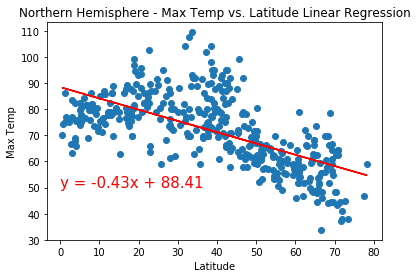

In [64]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
north = weather_df.loc[weather_df["Lat"] >= 0]
south = weather_df.loc[weather_df["Lat"] < 0]
x_values = north["Lat"]
y_values = north["Max Temp"]

plot_linear_regression(x_values, y_values,"Northern Hemisphere - Max Temp vs. Latitude Linear Regression", 'Max Temp',(0,50))

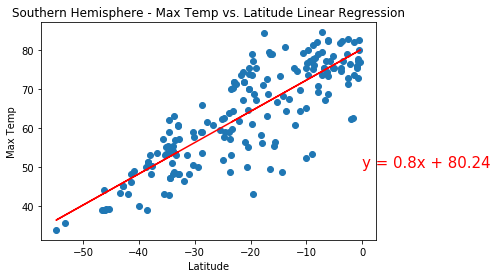

In [65]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = south["Lat"]
y_values = south["Max Temp"]

plot_linear_regression(x_values, y_values,"Southern Hemisphere - Max Temp vs. Latitude Linear Regression", 'Max Temp',(0,50))

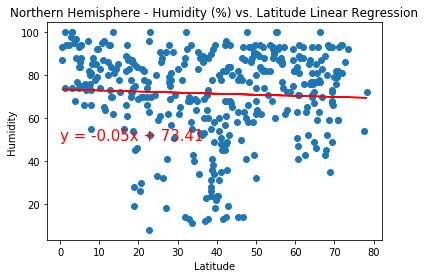

In [66]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = north["Lat"]
y_values = north["Humidity"]

plot_linear_regression(x_values, y_values,"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression", 'Humidity',(0,50))

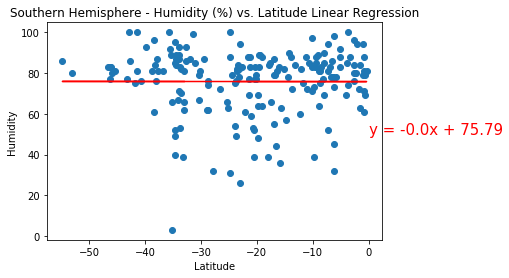

In [67]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = south["Lat"]
y_values = south["Humidity"]

plot_linear_regression(x_values, y_values,"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression", 'Humidity',(0,50))

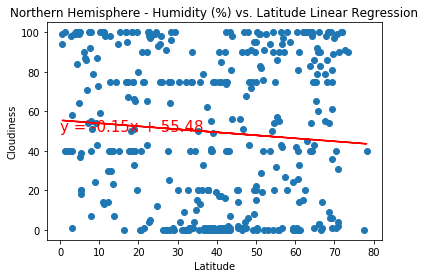

In [71]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = north["Lat"]
y_values = north["Cloudiness"]

plot_linear_regression(x_values, y_values,"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", 'Cloudiness',(0,50))

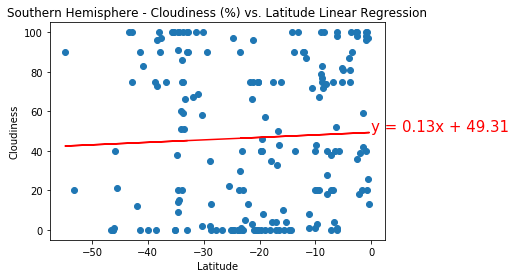

In [73]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = south["Lat"]
y_values = south["Cloudiness"]

plot_linear_regression(x_values, y_values,"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", 'Cloudiness',(0,50))

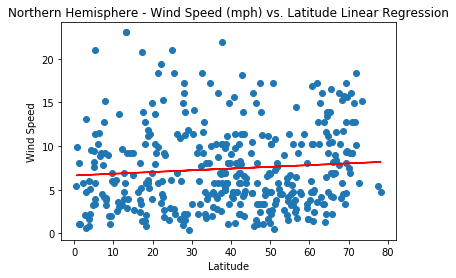

In [72]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = north["Lat"]
y_values = north["Wind Speed"]

plot_linear_regression(x_values, y_values,"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", 'Wind Speed',(0,50))

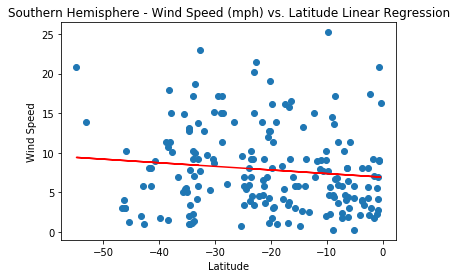

In [74]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = south["Lat"]
y_values = south["Wind Speed"]

plot_linear_regression(x_values, y_values,"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", ''Wind Speed'',(0,50))